# Lab 01 Getting Started 

# Kiến thức

Ta gọi $x_i=[1,x_{i_1},x_{i_2},...,x_{i_n}]$ là một sample có $n$ features (1 là bias). $X=[x_1,x_2,...,x_N]$ là bộ dữ liệu với $N$ samples. $Y=[y_1,y_2,...,y_N]$ là target values. 

Ta cần xây dựng một mô hình hồi quy: 

$$\hat{Y}=XW$$

Với $W\in R^{n+1\times 1}$ là một ma trận chứa các weights cần học. $Y\in R^{N\times 1}$, $X\in R^{N\times n+1}$. lưu ý nếu target value (hay $y$) là một vector thì ta sẽ thay $1$ bằng $m$ với $m$ là số chiều của vector $y$

Ta định nghĩa hàm Loss: 
$$L=\frac{1}{2}(\hat{Y}-Y)^2=\frac{1}{2}(XW-Y)^2$$

Đến đây ta muốn $Y$ và $\hat{Y}$ càng ngày gần nhau do đó ta sẽ tìm W sao cho L nhỏ nhất. Ta sẽ lấy đạo hàm của L theo W ta được
$$X^{T}(XW-y)$$
cho phương trình trên bằng 0 và giải ra ta được:
$$W=(X^{T}X)^{-1}X^Ty$$

Ta luôn giả sử $X^TX$ khả nghịch


In [1]:
#Thư viện
import numpy as np 
import matplotlib.pyplot as plt 
import random

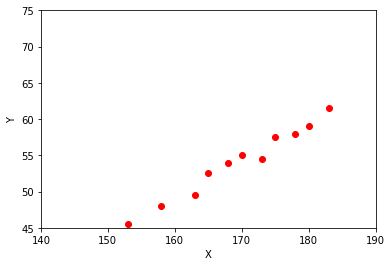

(13, 1)

In [2]:
#Tạo X
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# Tạo Y 
y = np.array([[ -33+0.5*i[0] + random.randint(1,3) for i in X]]).T
# Vẽ thử các điểm dữ liệu
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
y.shape

w =  [[-33.09120383]
 [  0.51395546]]


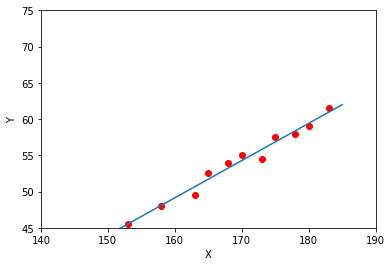

In [3]:
# Thêm 1 vào X
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)
 
# Tính W
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
 
# Tạo một đường thẳng model
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0
 
# Vẽ fitting line
plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Bài tập

1. Hãy dùng bộ dữ liệu dibetes để thiết lập mô hình Linear Regresion
2. Hãy tìm target values của diabetes_X_test rồi so sánh với target values trong diabetes_y_test
3. Tìm hiểu sklearn và làm lại yêu cầu câu 2 (câu cộng điểm)

In [4]:
  from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train,diabetes_y_train=diabetes_X[:-2],diabetes_y[:-2].reshape(1,-1).T
diabetes_X_test,diabetes_y_test=diabetes_X[-2:],diabetes_y[-2:].reshape(1,-1).T

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


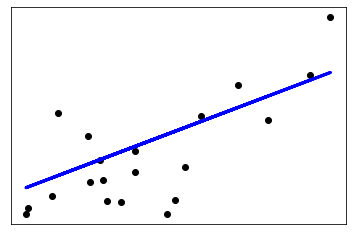

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
 
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]
 
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
 
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]
 
# Create linear regression object
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)
 
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)
 
# The coefficients
print('Coefficients: \n', regr.coef_)
# The coefficients
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))
 
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
 
plt.xticks(())
plt.yticks(())
 
plt.show()

In [6]:
# Create linear regression object
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)
 
# Find w
w = np.array([np.append(regr.coef_, regr.predict(diabetes_X_test))])

Câu 1

In [7]:
#Train test split
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train,diabetes_y_train=diabetes_X[:-2],diabetes_y[:-2]
diabetes_X_test,diabetes_y_test=diabetes_X[-2:],diabetes_y[-2:]
# Thêm 1 vào X
one = np.ones((diabetes_X_train.shape[0], 1),dtype = np.int8)
Xbar = np.concatenate((diabetes_X_train, one), axis = 1)
 
# Tính W
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, diabetes_y_train)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)


w =  [  -9.38654069 -239.50541995  519.71747928  324.62241148 -788.75647584
  474.10341796   98.46801188  175.8004285   749.38200399   67.88567794
  152.10620412]


Câu 2

In [57]:
def targets_X_test(w, diabetes_X_test):
    targets_X_test = []
    for i in diabetes_X_test:
         targets_X_test.append(np.append(x,1).dot(w))
    return targets_X_test

In [58]:
targets_X_test(w, diabetes_X_test)

[array([211.74929866]), array([211.74929866])]

In [10]:
diabetes_y_test

array([220.,  57.])

In [11]:
def Cost_function(y_pred, y):
    companies = len(y_pred)
    total_error = 0.0
    for i in range(companies):
        total_error += ((y_pred[i] - y[i]))**2
    return total_error / (2 * companies)

In [13]:
Cost_function(targets_X_test, diabetes_y_test)

20.641979211472606

Câu 3

In [14]:
from sklearn.linear_model import LinearRegression

In [30]:
# Create linear regression object
regr = LinearRegression()
 
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

#Find w
w = np.array([np.append(regr.coef_, regr.intercept_)]).T

In [31]:
w

array([[  -9.38654069],
       [-239.50541995],
       [ 519.71747928],
       [ 324.62241148],
       [-788.75647584],
       [ 474.10341796],
       [  98.46801188],
       [ 175.8004285 ],
       [ 749.38200399],
       [  67.88567794],
       [ 152.10620412]])

In [33]:
targets_X_test = []
for x in diabetes_X_test:
    targets_X_test.append(np.append(x,1).dot(w))
targets_X_test = np.array(targets_X_test)

In [34]:
targets_X_test

array([[211.74929866],
       [ 53.19292183]])